# Setup

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow as show
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Making a dataset

Because the data is temporal in nature, the label for an input will be the next input in sequence.

## Loading Images

In [3]:
pngs_dir = "/content/drive/MyDrive/ENEE439D Group Project/Cloud Data /PNGs"

In [4]:
images = []
for filename in os.listdir(pngs_dir):
  if (filename.find("Masked") >= 0):
    images.append(filename)

In [5]:
images.sort()
data = []
for name in images:
  datapoint = cv2.imread(pngs_dir + "/" + name,0)
  data.append(datapoint)

In [6]:
data = np.array(data)
print(data.shape)

(2001, 292, 583)


## Normalize the Data

In [7]:
def resize_image(image):
  padding_column = np.zeros((image.shape[0],1),dtype=image.dtype)
  resized_image = np.concatenate((image,padding_column), axis=1)
  return resized_image

In [8]:
data = np.array([resize_image(img) for img in data])

In [9]:
data = data - data.mean()

In [10]:
print(data.shape)

(2001, 292, 584)


## Data vs Labels

In [11]:
labels = data[1:]
data_in = data[0:-1]
data = None

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_in, labels, test_size=0.33)
labels = None
data_in = None

# Convolutional Autoencoder w/o Optical Flow

In [13]:
model = models.Sequential()

#Encoder
input_img = layers.Input(shape=(292,584,1))

x = layers.Conv2D(32, (3,3), activation='relu',padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(64, (3,3), activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

#Decoder
x = layers.Conv2D(64, (3,3), activation='relu',padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3), activation='sigmoid',padding='same')(x)

#Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 292, 584, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 292, 584, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 146, 292, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 292, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 146, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 73, 146, 64)       36928 

In [14]:
history = autoencoder.fit(X_train,y_train,batch_size=50,epochs=10,)

Epoch 1/10
27/27 [==============================] - 40s 810ms/step - loss: 1928.0918
Epoch 2/10
27/27 [==============================] - 10s 388ms/step - loss: 1926.5967
Epoch 3/10
27/27 [==============================] - 10s 383ms/step - loss: 1926.5663
Epoch 4/10
27/27 [==============================] - 11s 391ms/step - loss: 1926.5398
Epoch 5/10
27/27 [==============================] - 11s 399ms/step - loss: 1926.5229
Epoch 6/10
27/27 [==============================] - 11s 401ms/step - loss: 1926.5077
Epoch 7/10
27/27 [==============================] - 11s 403ms/step - loss: 1926.4965
Epoch 8/10
27/27 [==============================] - 11s 404ms/step - loss: 1926.4904
Epoch 9/10
27/27 [==============================] - 11s 408ms/step - loss: 1926.4785
Epoch 10/10
27/27 [==============================] - 11s 407ms/step - loss: 1926.4841


## Model Training Analysis

### Loss Curves and Metrics

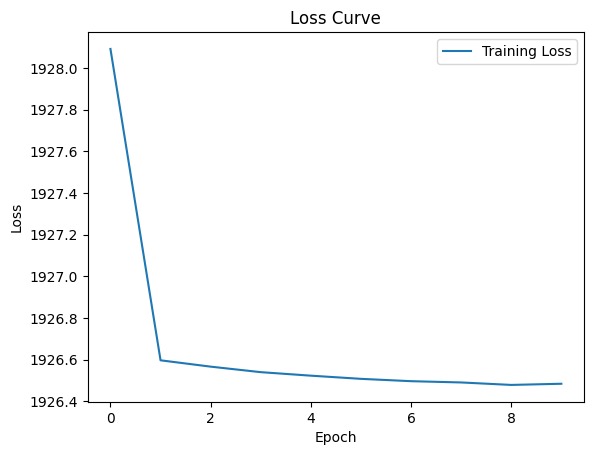

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Visualize Output

21/21 [==============================] - 8s 192ms/step


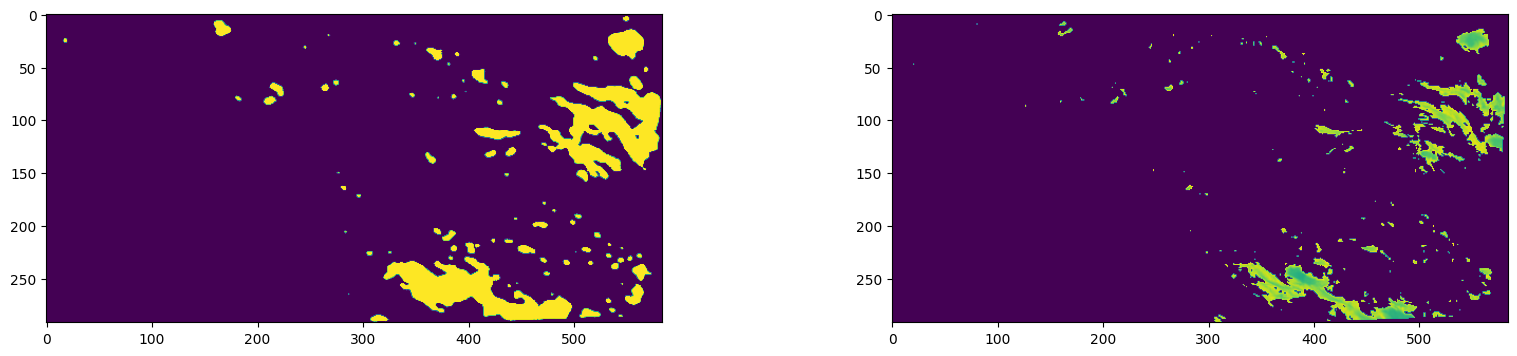

In [16]:
decoded_images = autoencoder.predict(X_test)

plt.figure(figsize=(20,4))
ax = plt.subplot(1,2,1)
plt.imshow(decoded_images[11])
ax = plt.subplot(1,2,2)
plt.imshow(y_test[11])
plt.show()

In [17]:
def getmax(arr):
  max = 0
  (i,j) = arr.shape
  for n in range(i):
    for m in range(j):
      if arr[n][m] >= max:
        max = arr[n][m]
  return max

In [ ]:
decoded_images[0].shape

(292, 584, 1)

In [ ]:
y_test[0].shape

(292, 584)